# Banana World!

This is the report for the Udacity Deep Reinforcement Learning Nanodegree navigation project, based on the [`Value-based-methods`](https://github.com/udacity/Value-based-methods) repository code and related lectures. See the `README.md` for a description of the Unity environment.

## Learning Algorithm

The implemented learning algorithm is a _Double-DQN_ with _Prioritized Experience Replay_.

### Neural Network Model

The policy model is a feed-forward neural network with three fully-connected layers. The hidden layer size has been increased to **128** (from the original DQN example of 64) to have additional representational power.

### Hyperparameters

Hyperparameters have been kept the same as the DQN code provided in the repository, with two exceptions:

 1. Prioritized Experience Replay hyperparameters have been introduced, with values: `a = 0.6`, `epsilon = 0.01`, `b = 0.4`, and linear growth of `b` for each sample of `0.001`.
 2. `UPDATE_EVERY` has been set to 8 for DDQN + PER, to keep the target more stable and improve training speed for PER (given some of its performance penalties).

### Implementation Details

DDQN is implemented in `agent.py` evaluating the next states on the local network, and gathering the actions from the target network values instead.

Prioritized Experience Replay is implemented in `replay_buffer.py`. The API is mostly the same of the original `ReplayBuffer`, but now we return indices, values, and importance sampling score. The implementation is not the most efficient (it uses `np.random.choice` effectively implementing the algorithm described in the lecture). A better option would be using a sum-tree for update and sampling, but for this project this simpler implementation worked well enough.

Minor changes to the code have also been applied, mostly refactoring files and using simpler APIs like PyTorch `amax`.

## Training

Training runs for 1500 episodes, but it is solved around 700.

Let's import the necessary modules and define some utility functions.

In [1]:
from agent import Agent
from banana_world import BananaWorld
from dqn import DQN

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [2]:
def plot(scores):
    """Plot scores and their running average."""
    avgs = pd.Series(scores).rolling(100).mean()
    x = np.arange(len(scores))
    plt.figure('Episode scores')
    plt.plot(x, scores, label='Scores')
    plt.plot(x, avgs, 'r', label='Running average')
    plt.ylabel('Score')
    plt.xlabel('Episode #')
    plt.show()

In [3]:
# Create our Banana World!
banana_world = BananaWorld()

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Let's train an agent!

In [4]:
agent = banana_world.new_agent()
scores = banana_world.train(agent)

Training a new agent (ddqn=True, PER=True, save=False)
Episode 100	Average Score: 0.49
Episode 200	Average Score: 1.77
Episode 300	Average Score: 3.08
Episode 400	Average Score: 5.22
Episode 500	Average Score: 8.62
Episode 600	Average Score: 12.11
Environment solved at episode 652 with score 13.05!
Episode 700	Average Score: 13.83
Episode 800	Average Score: 16.59
Episode 900	Average Score: 16.82
Episode 1000	Average Score: 17.33
Episode 1100	Average Score: 16.55
Episode 1200	Average Score: 16.36
Episode 1300	Average Score: 16.90
Episode 1400	Average Score: 16.19
Episode 1500	Average Score: 17.43


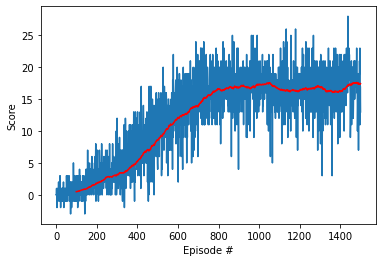

In [5]:
plot(scores)

## Ideas for Future Work

To expand on this work:

 * Implement all the DQN improvements in the literature, reaching the Rainbow!
 * Tweak hyperparameters more (e.g., network topology, update rate, tau, replay buffer size).
 * Apply other deep reinforcement learning algorithms and compare their performance.

## Appendix: Comparisons And Variations

Let's compare the results with the "vanilla" fixed Q-targets, just double DQN, and just prioritized experience replay.

In [4]:
# vanilla fixed-Q targets
agent_vanilla = banana_world.new_agent(ddqn=False, PER=False)
scores_vanilla = banana_world.train(agent_vanilla)

Training a new agent (ddqn=False, PER=False, save=False)
Episode 100	Average Score: 0.55
Episode 200	Average Score: 3.85
Episode 300	Average Score: 7.38
Episode 400	Average Score: 9.73
Episode 500	Average Score: 12.50
Environment solved at episode 543 with score 13.05!
Episode 600	Average Score: 13.84
Episode 700	Average Score: 14.18
Episode 800	Average Score: 14.65
Episode 900	Average Score: 15.24
Episode 1000	Average Score: 15.32
Episode 1100	Average Score: 15.45
Episode 1200	Average Score: 15.26
Episode 1300	Average Score: 16.06
Episode 1400	Average Score: 16.09
Episode 1500	Average Score: 15.42


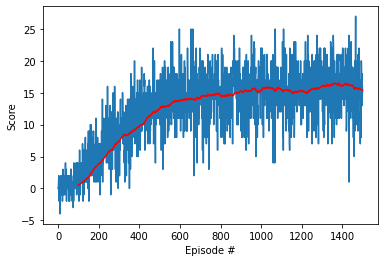

In [5]:
plot(scores_vanilla)

In [6]:
# Double DQN
agent_ddqn = banana_world.new_agent(ddqn=True, PER=False)
scores_ddqn = banana_world.train(agent_ddqn)

Training a new agent (ddqn=True, PER=False, save=False)
Episode 100	Average Score: 0.20
Episode 200	Average Score: 1.36
Episode 300	Average Score: 5.55
Episode 400	Average Score: 9.11
Episode 500	Average Score: 11.52
Environment solved at episode 568 with score 13.00!
Episode 600	Average Score: 13.50
Episode 700	Average Score: 13.70
Episode 800	Average Score: 15.09
Episode 900	Average Score: 15.45
Episode 1000	Average Score: 15.77
Episode 1100	Average Score: 17.45
Episode 1200	Average Score: 16.72
Episode 1300	Average Score: 16.58
Episode 1400	Average Score: 15.25
Episode 1500	Average Score: 16.71


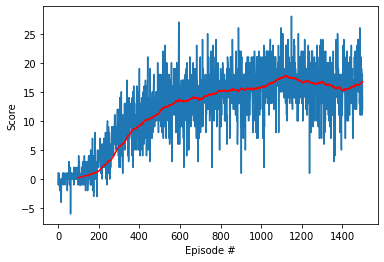

In [7]:
plot(scores_ddqn)

In [8]:
# vanilla fixed-Q targets
agent_per = banana_world.new_agent(ddqn=False, PER=True)
scores_per = banana_world.train(agent_per)

Training a new agent (ddqn=False, PER=True, save=False)
Episode 100	Average Score: 0.20
Episode 200	Average Score: 0.71
Episode 300	Average Score: 2.98
Episode 400	Average Score: 5.21
Episode 500	Average Score: 8.60
Episode 600	Average Score: 10.45
Environment solved at episode 691 with score 13.06!
Episode 700	Average Score: 13.40
Episode 800	Average Score: 14.14
Episode 900	Average Score: 15.45
Episode 1000	Average Score: 16.89
Episode 1100	Average Score: 16.39
Episode 1200	Average Score: 15.84
Episode 1300	Average Score: 16.64
Episode 1400	Average Score: 16.39
Episode 1500	Average Score: 16.99


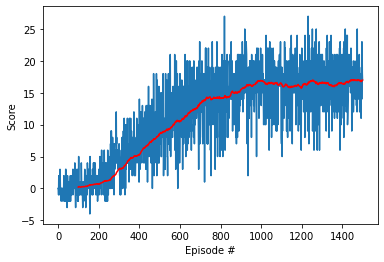

In [10]:
plot(scores_per)

### Observations

 * The vanilla fixed Q-targets approach solves the environment faster, but it achieves lower average scores with more training.
 * Double DQN peaks higher than vanilla fixed Q-targets, but it seems to oscillate more and have lower average score than DDQN + PER.
 * Just Prioritized Experience Replay seems to perform well, but scores grow slightly slower. It is unclear whether pairing it with DDQN vs. only PER and training for longer is the best approach.